## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](pandas.pydata.org/) is an important package for Python data analysis.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Problem Statement ##

You are given a dataset containing:
    - a training set for a linear function
    - a test set for testing the learned hypothesis function
    
You will build a simple linear regression algorithm that can correctly identify the parameters of w0 and w1.

In [66]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for W and initializes w_0 to 0.
    
    Argument:
    dim -- size of the W vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (dim, 1)
    w_0 -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### 
    # Hint: you can use np.zeros to initialize W
    W = np.zeros([dim,1], dtype=float)
    w_0 = 0
    ### END CODE HERE ###

    assert(W.shape == (dim, 1))
    assert(isinstance(w_0, float) or isinstance(w_0, int))
    return W, w_0

## 3 - Gradient Descent ##

Forward Propagation:
- You get X
- You compute $h_{W}(X) = W^T * X + w_{0}\tag{1}$
- You calculate the cost function:  $$E(W) = \frac{1}{2m} \sum_{i=1}^{n} \left(h_{W}(x^{(i)})  - y^{(i)}\right)^2\tag{2}$$. 

Here are the two formulas you will be using: 

$$ \frac{\partial E}{\partial w_{j}} = \frac{1}{m} \sum_{i=1}^m (( h_{W}(x^{(i)}) -y^{(i)}) * x_{j}^{(i)})\tag{3}$$
$$ \frac{\partial E}{\partial w_{0}} = \frac{1}{m} \sum_{i=1}^m (h_{W}(x^{(i)}) -y^{(i)})\tag{4}$$

The weights will be updated:
$$ w_{j} = w_{j} - {\alpha} * \frac{\partial E}{\partial w_{j}}\tag{5}$$
 

In [67]:
# Gradient Descent Algorithm

def gradient_descent(W, w_0, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes W by running a gradient descent algorithm
    
    Arguments:
    W -- the weight vector
    w_0 -- bias, a scalar
    X -- data of the single feature
    Y -- true "label" vector 
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You need to finish the following steps:
        1) Calculate the cost and the gradient for the current parameters. 
        2) Update the parameters using gradient descent rule for w_0 and w_1.
    """
    
    costs = []
    
    
    for i in range(num_iterations):
        # Get the number of training examples
        m = X.shape[1]
        
        
        ### START CODE HERE ### 
        # Calculate the heuristic function: h(x) = W.T * X + w_0
        Y_hat = np.dot(W.T,X)+ w_0
        ### END CODE HERE ###
    
    
        ### START CODE HERE ### 
        # Calculate cost, dw, and dw_0
        
        cost = np.sum(np.square(np.subtract(Y_hat,Y)))
        dw = np.dot(X, np.subtract(Y_hat,Y).T)
        dw_0 = np.sum(np.subtract(Y_hat,Y).T)
        
        cost /= 2 * m
        dw = np.divide(dw, m)
        dw_0 = np.divide(dw_0, m)
        
        ### END CODE HERE ###
        
        
        ### START CODE HERE ### 
        # Update W and w_0
        
        W = np.subtract(W, np.multiply(learning_rate, dw))
        w_0 = np.subtract(w_0, np.multiply(learning_rate, dw_0))
        
        ### END CODE HERE ###
        
        
        if((i % 100) == 0):
            costs.append(cost)
            
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        
    params = {
        "W": W,
        "w_0": w_0
    }

    grads = {
        "dw": dw,
        "dw_0": dw_0
    }
        
    return params, grads, costs

### Make Predictions ###
The predicted output is calculated as $h_{W}(X) = W^T * X + w_{0}$

In [68]:
# GRADED FUNCTION: predict

def predict(W, w_0, X):
    '''
    Predict the real values using learned parameters (W, w_0)
    
    Arguments:
    W -- weights, a numpy array of size 
    w_0 -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    W = W.reshape(X.shape[0], 1)
    
    ### START CODE HERE ### 
    Y_prediction = np.dot(W.T,X)+ w_0
    ### END CODE HERE ###
    
    
    return Y_prediction

### Feature Scaling ###
Here you normalize features using:
$ \frac{x_{i} - mean}{\sigma}$, where $\sigma$ is the standard deviation

In [69]:
def normalize(mtx):
    '''
    mtx: the matrix that needs to be normalized. Note that each column represents a training example. 
         The number of columns is the the number of training examples
    '''
    # Calculate mean for each feature
    # Pay attention to the value of axis = ?
    ### START CODE HERE ###
    mean = np.mean(mtx)
    std = np.std(mtx)
    mtx = (mtx-mean) /std
    ### END CODE HERE ###
    
    return mtx

In [70]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = False):
    """
    Builds the linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) 
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    dim = X_train.shape[0]
    W, w_0 = initialize_with_zeros(dim)
    
    #X_train = normalize(X_train)
    #X_test = normalize(X_test)
    
    
    # Gradient descent 
    ### START CODE HERE ###
    parameters, grads, costs = gradient_descent( W, w_0, X_train, Y_train, num_iterations, learning_rate, print_cost)
    ### END CODE HERE ###
        
    # Retrieve parameters w and w_0 from dictionary "parameters"
    W = parameters["W"]
    w_0 = parameters["w_0"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    ### START CODE HERE ###
    Y_prediction_train = predict(W, w_0, X_train)
    Y_prediction_test =  predict(W, w_0, X_test)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    print("w is ", W)
    print("w_0 is ", w_0)
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Load Data and Start the Learning Process ###
You can change num_iterations and learning_rate to see the learning process

In [71]:
df = pd.read_csv('prj2house.csv', header=None)
X_train = df[[0, 1]].values.T
Y_train = df[2].values.reshape(-1, 1).T


df_test = pd.read_csv('prj2house_test.csv', header=None)
X_test = df_test[[0, 1]].values.T
Y_test = df_test[2].values.reshape(-1, 1).T


d = model(X_train, Y_train, X_test, Y_test, num_iterations = 1800, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 65591548106.457443
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
train accuracy: nan %
test accuracy: nan %
w is  [[nan]
 [nan]]
w_0 is  nan


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in square
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in subtract


### Plot the learning curve ###

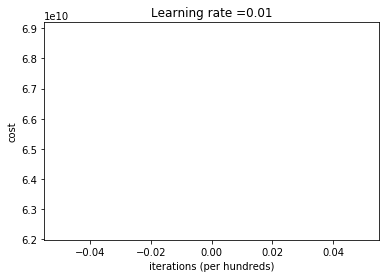

In [72]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()